### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [3]:
# unir las bases de datos en una sola
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
df_total.head()

# calcular facturación por tienda
facturacion_por_tienda = df_total.groupby('Lugar de Compra')['Precio'].sum()
pd.options.display.float_format = '{:,.2f}'.format
print(facturacion_por_tienda)

Lugar de Compra
Armenia            12,242,900.00
Barranquilla      132,040,500.00
Bogotá          1,814,858,300.00
Bucaramanga        90,573,300.00
Cali              506,526,100.00
Cartagena         102,376,700.00
Cúcuta             99,369,100.00
Inírida             8,087,900.00
Leticia            67,149,900.00
Manizales          19,367,900.00
Medellín        1,096,669,200.00
Neiva              20,898,000.00
Pasto              49,014,300.00
Pereira           225,927,300.00
Riohacha           73,879,700.00
Santa Marta        53,100,500.00
Soacha             12,317,700.00
Valledupar          5,886,300.00
Villavicencio      13,333,600.00
Name: Precio, dtype: float64


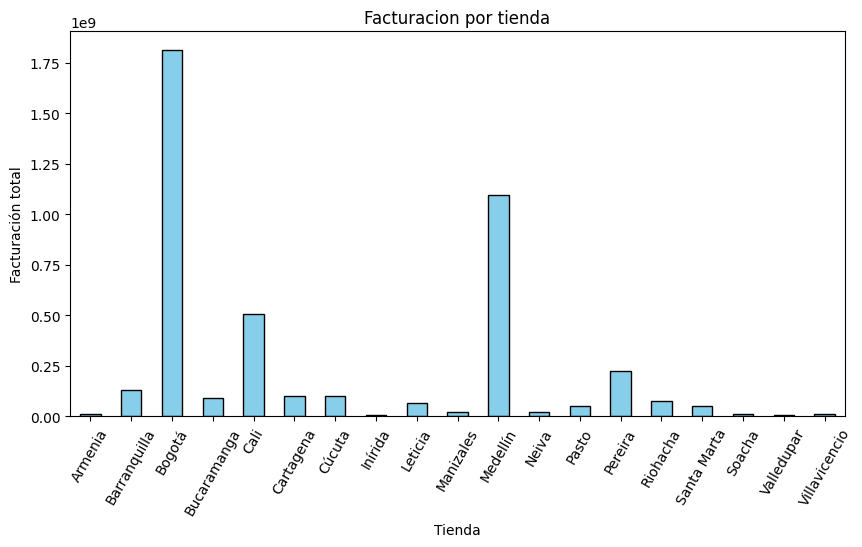

In [4]:
import matplotlib.pyplot as plt

# crear grafico de barras
plt.figure(figsize=(10, 5))
facturacion_por_tienda.plot(kind='bar', color="skyblue", edgecolor="black")

# etiquetas y titulo
plt.xlabel('Tienda')
plt.ylabel('Facturación total')
plt.title('Facturacion por tienda')
plt.xticks(rotation=60, fontsize=10)

# mostrar gráfico
plt.show()


# 2. Ventas por categoría

In [8]:
# calcular categorias por tienda
ventas_por_tienda_categoria = df_total.groupby(['Lugar de Compra', 'Categoría del Producto']).size().unstack()
print(ventas_por_tienda_categoria)

Categoría del Producto  Artículos para el hogar  Deportes y diversión  \
Lugar de Compra                                                         
Armenia                                    3.00                  1.00   
Barranquilla                              29.00                 30.00   
Bogotá                                   297.00                485.00   
Bucaramanga                                6.00                 21.00   
Cali                                      72.00                130.00   
Cartagena                                 21.00                 27.00   
Cúcuta                                    13.00                 16.00   
Inírida                                     NaN                  3.00   
Leticia                                    8.00                 25.00   
Manizales                                  4.00                  8.00   
Medellín                                 192.00                249.00   
Neiva                                      1.00    

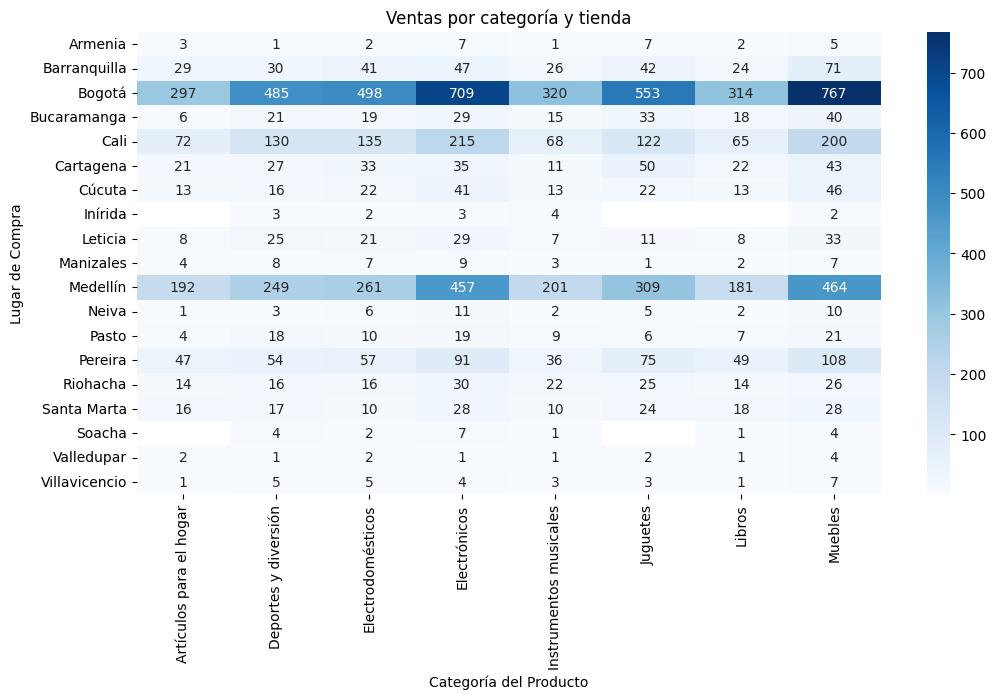

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(ventas_por_tienda_categoria, annot=True, fmt=".0f", cmap="Blues", annot_kws={"size": 10})

plt.xlabel("Categoría del Producto")
plt.ylabel("Lugar de Compra")
plt.title("Ventas por categoría y tienda")

plt.show()

# 3. Calificación promedio de la tienda


In [10]:
# promedio calificacion por tienda
calificacion_promedio_por_tienda = df_total.groupby('Lugar de Compra')["Calificación"].mean()
print(calificacion_promedio_por_tienda)

Lugar de Compra
Armenia         3.46
Barranquilla    3.80
Bogotá          4.11
Bucaramanga     3.98
Cali            4.05
Cartagena       4.02
Cúcuta          3.94
Inírida         3.64
Leticia         3.92
Manizales       3.63
Medellín        3.93
Neiva           3.80
Pasto           4.15
Pereira         4.01
Riohacha        3.90
Santa Marta     3.60
Soacha          3.89
Valledupar      4.07
Villavicencio   3.83
Name: Calificación, dtype: float64


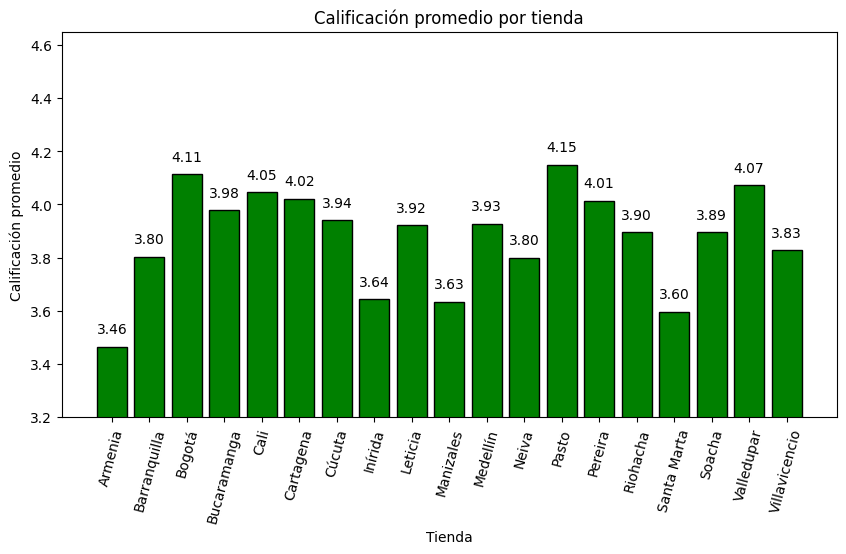

In [11]:
import matplotlib.pyplot as plt

# crear grafico
plt.figure(figsize=(10, 5))

bars = plt.bar(calificacion_promedio_por_tienda.index, calificacion_promedio_por_tienda, color="green", edgecolor="black")
# ajustar el límite del eje Y
plt.ylim(3.2, calificacion_promedio_por_tienda.max() + 0.5)

# agregar valores encima de cada barra
for bar in bars:
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, f"{bar.get_height():.2f}", ha='center', fontsize=10)

# titulos y etiquetas
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.title('Calificación promedio por tienda')
plt.xticks(rotation=75, fontsize=10)

# mostrar grafico
plt.show()

# 4. Productos más y menos vendidos

In [12]:
# contar cantidad de ventas por producto en cada tienda
ventas_por_producto_tienda = df_total.groupby(['Lugar de Compra', 'Producto']).size().unstack()
print(ventas_por_producto_tienda)

# encontrar el producto más y menos vendido por tienda
productos_mas_vendidos = ventas_por_producto_tienda.idxmax(axis=1)
productos_menos_vendidos = ventas_por_producto_tienda.idxmin(axis=1)

print("Productos más vendidos por tienda:\n", productos_mas_vendidos)
print("\nProductos menos vendidos por tienda:\n", productos_menos_vendidos)

Producto         Ajedrez de madera  Armario  Asistente virtual  Auriculares  \
Lugar de Compra                                                               
Armenia                        NaN      NaN               1.00          NaN   
Barranquilla                 10.00     6.00               9.00         6.00   
Bogotá                       77.00    73.00              68.00        71.00   
Bucaramanga                   5.00     4.00               2.00         1.00   
Cali                         20.00    25.00              17.00        18.00   
Cartagena                     7.00     2.00               2.00         2.00   
Cúcuta                        3.00     6.00               6.00         2.00   
Inírida                        NaN      NaN                NaN          NaN   
Leticia                        NaN     6.00                NaN         5.00   
Manizales                      NaN     1.00               1.00         1.00   
Medellín                     38.00    57.00         

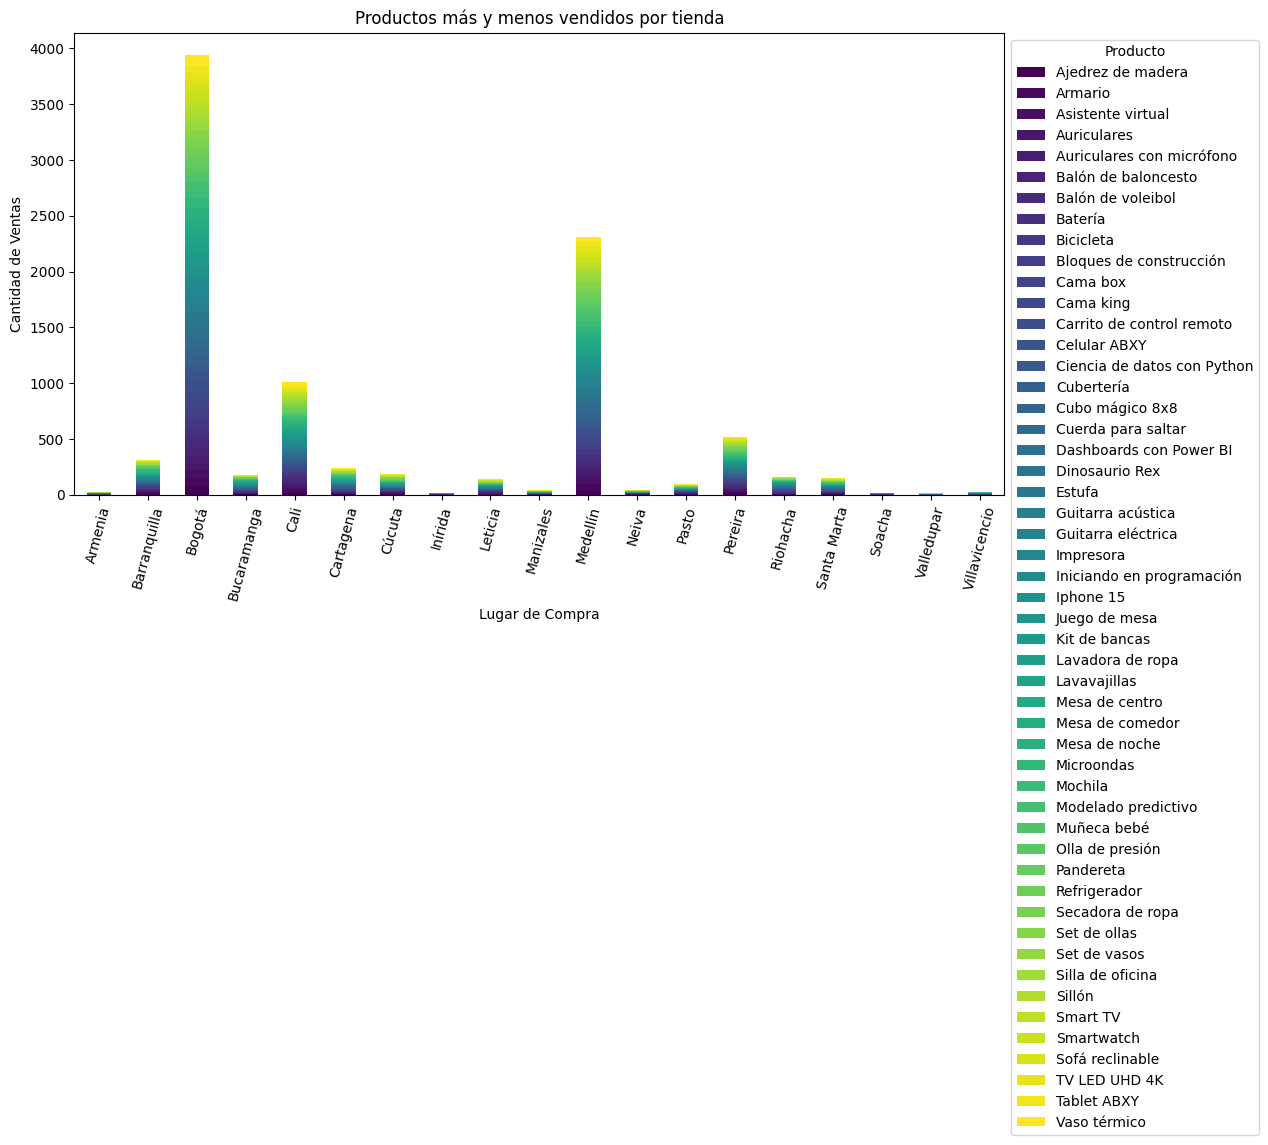

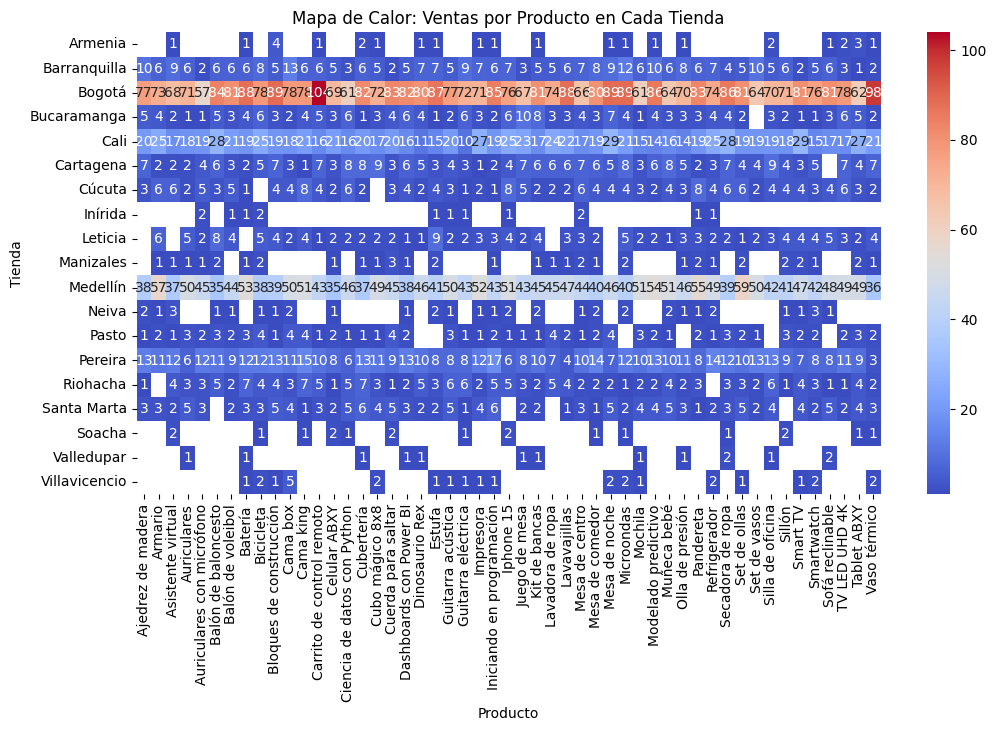

In [13]:
import matplotlib.pyplot as plt

# generar gráfico de barras apiladas
ventas_por_producto_tienda.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

# etiquetas y titulo
plt.xlabel("Lugar de Compra")
plt.ylabel("Cantidad de Ventas")
plt.title("Productos más y menos vendidos por tienda")
plt.xticks(rotation=75, fontsize=10)
plt.legend(title="Producto", bbox_to_anchor=(1, 1))

# mostrar gráfico
plt.show()

# heatmap usando seaborn
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(ventas_por_producto_tienda, annot=True, fmt=".0f", cmap="coolwarm")

plt.xlabel("Producto")
plt.ylabel("Tienda")
plt.title("Mapa de Calor: Ventas por Producto en Cada Tienda")

plt.show()



# 5. Envío promedio por tienda

In [5]:
# calcular el costo de envío promedio por tienda
costo_envio_promedio = df_total.groupby('Lugar de Compra')['Costo de envío'].mean()
print(costo_envio_promedio)

Lugar de Compra
Armenia         22,867.86
Barranquilla    22,692.26
Bogotá          24,532.08
Bucaramanga     26,790.06
Cali            26,726.81
Cartagena       22,638.43
Cúcuta          28,597.31
Inírida         30,557.14
Leticia         25,317.61
Manizales       24,948.78
Medellín        25,282.02
Neiva           27,710.00
Pasto           27,801.06
Pereira         23,211.41
Riohacha        24,127.61
Santa Marta     18,752.32
Soacha          34,768.42
Valledupar      22,021.43
Villavicencio   25,100.00
Name: Costo de envío, dtype: float64


<ipython-input-19-246babc5bd4a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Lugar de Compra", y="Costo de envío", data=df_total, palette="coolwarm")


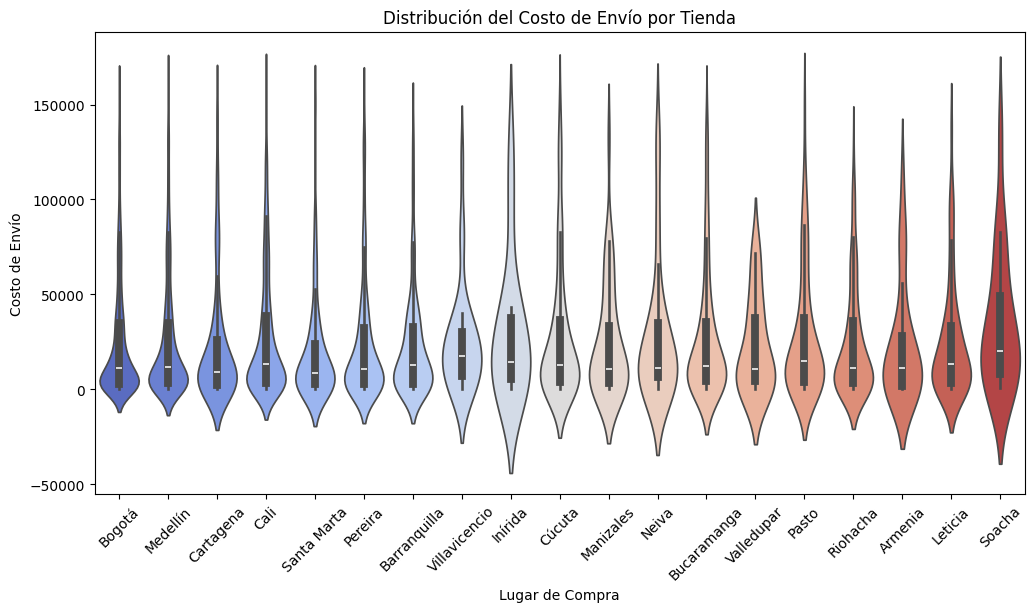

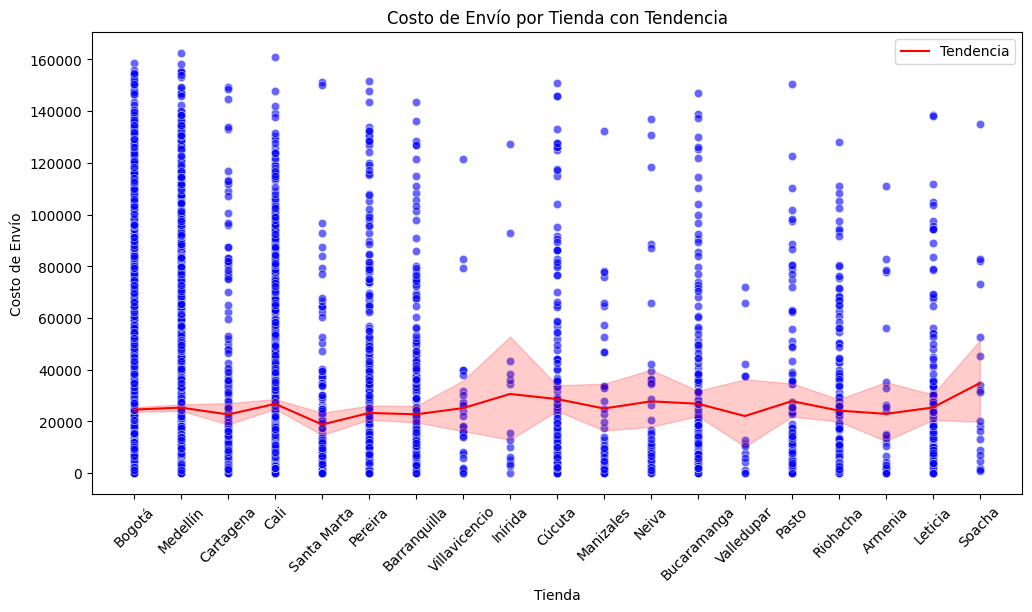

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# gráfico de violín
plt.figure(figsize=(12, 6))
sns.violinplot(x="Lugar de Compra", y="Costo de envío", data=df_total, palette="coolwarm")

plt.xlabel("Lugar de Compra")
plt.ylabel("Costo de Envío")
plt.title("Distribución del Costo de Envío por Tienda")
plt.xticks(rotation=45)

plt.show()

# scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Lugar de Compra", y="Costo de envío", data=df_total, alpha=0.6, color="blue")

sns.lineplot(x="Lugar de Compra", y="Costo de envío", data=df_total, color="red", label="Tendencia")

plt.xlabel("Tienda")
plt.ylabel("Costo de Envío")
plt.title("Costo de Envío por Tienda con Tendencia")
plt.xticks(rotation=45)

plt.show()


# Informe de Evaluación: Determinación de la Tienda a Vender

## Introducción
El presente informe tiene como objetivo analizar las diferentes tiendas del Sr. Juan para determinar cuál es la mejor opción a vender. Para ello, se han examinado múltiples factores clave, incluyendo los ingresos totales por tienda, la popularidad de las categorías de productos, las calificaciones promedio de los clientes, los productos más y menos vendidos y el costo de envío promedio. A través de estos análisis, respaldados por gráficos y datos concretos, se busca identificar la tienda con menor rendimiento en comparación con las demás.

## Desarrollo
### 1. Ingresos totales de las tiendas
El análisis de facturación muestra diferencias en el desempeño económico de las distintas ubicaciones. Algunas tiendas tienen ingresos significativamente mayores, mietnras que otras presentan cifras más bajas, lo que puede ser indicativo de menor demanda o problemas operativos.
### 2. Categorías de Productos Más y Menos Vendidas
Se analizaron las categorías más populares en cada tienda. Mientras algunas tiendas tienen una alta demanda en categorías específicas, otras presentan ventas más dispersas o enfocadas en productos de menor rotación. Esto es clave para evaluar la competitividad y atractivo comercial de cada ubicación.
### 3. Calificaciones promedio de los clientes por tienda
El nivel de satisfacción del cliente es fundamental para evaluar la reputación de cada tienda. Se identificó que ciertas tiendas presentan calificaciones consistentemente bajas, lo que puede estar relacionado con problemas en la calidad de productos o servicios al cliente.
### 4. Productos más y menos vendidos
El análisis detallado de los productos con mayor y menor volumen de ventas muestra diferencias sustanciales entre tiendas. Aquellas con una alta concentración de ventas en pocos productos pueden enfrentar riesgos si estos productos pierden demanda en el futuro.
### 5. Coste de envío promedio por tienda
El costo de envío es otro factor crítico en la decisión. Tiendas con costos de envío elevados pueden ser menos competitivas y menos rentables.

## Conclusión y recomendación
Tras analizar estos factores, se recomienda vender la tienda que presenta la combinación de los siguientes elementos negativos:
- Menores ingresos totales
- Baja demanda en categorías de productos clave
- Calificaciones de clientes más bajas
- Productos menos vendidos en comparación con otras tiendas
- Costos de envío más altos que afectan la rentabilidad

Con base en todos los factores analizados, Inírida y Soacha son las tiendas con peores indicadores en general:
- Baja facturación
- Pocas ventas en múltiples categorías
- Calificación promedio baja
- Costos de envío altos

_*Recomendación*_: Si desea optimizar su negocio, venda la tienda de Soacha o Inírida. Es la mejor decisión.

